In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from IPython.display import display

# Directory containing CSV files
DATA_DIR = Path("data")

# Get all CSV files in the directory
result_files = list(DATA_DIR.glob("*.csv"))

# Ensure CSV files exist
if not result_files:
    raise FileNotFoundError("No CSV files found in 'data'.")

# Load non-empty CSV files into a dictionary
results = {
    file.name: pd.read_csv(file) for file in result_files if file.stat().st_size > 0
}

# Ensure at least one valid file was loaded
if not results:
    raise ValueError("No non-empty CSV files found.")

# Map filenames to quantization methods
methods = {
    "eval_sq_results.csv": "Scalar Quantization (SQ)",
    "eval_bq_results.csv": "Binary Quantization (BQ)",
    "eval_rvq_results.csv": "Residual Vector Quantization (RVQ)",
    "eval_pq_results.csv": "Product Quantization (PQ)",
    "eval_tsvq_results.csv": "Tree-Structured Quantization (TSVQ)",
    "eval_opq_results.csv": "Optimized Product Quantization (OPQ)",
}

# Process DataFrames
dfs = []
for filename, df in results.items():
    df = df.copy()
    df["method"] = methods.get(filename, filename)  # Assign method name
    dfs.append(df)
    
    print(f"File: {filename}")
    display(df.drop(columns=["method"]))
    print("=" * 100)

File: eval_sq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,0,0.707780,0.000001,0.990801
1,5000,128,0,3.506898,0.000001,0.989901
2,10000,128,0,6.823030,0.000001,0.988701
3,50000,128,0,35.029063,0.000001,0.989601
4,100000,128,0,78.446909,0.000001,0.989701


File: eval_bq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,0,0.266548,0.083240,0.2751
1,5000,128,0,0.535975,0.083518,0.2031
2,10000,128,0,0.845069,0.083462,0.1725
3,50000,128,0,5.251830,0.083333,0.1901
4,100000,128,0,9.180096,0.083335,0.1889


File: eval_rvq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,132.960991,43.432912,0.010145,0.0769
1,5000,128,1203.729579,401.468525,0.056431,0.0565
2,10000,128,2278.733670,838.764111,0.062624,0.0312
3,50000,128,13338.311261,2937.063166,0.059676,0.0291
4,100000,128,25605.946347,5741.968884,0.061311,0.0226


File: eval_pq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,73.615063,17.950253,0.013303,0.412199
1,5000,128,518.150034,92.226942,0.018541,0.231400
2,10000,128,973.570630,160.823840,0.019639,0.194200
3,50000,128,7449.083979,1564.312583,0.020751,0.195500
4,100000,128,20742.259311,3351.152667,0.020894,0.198700


File: eval_tsvq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,6.229776,3.969920,0.028214,0.5837
1,5000,128,18.385545,9.263590,0.068361,0.0183
2,10000,128,24.516111,18.696520,0.072936,0.0117
3,50000,128,182.818666,97.233113,0.076896,0.0084
4,100000,128,229.348928,188.042034,0.077492,0.0116


File: eval_opq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,642.139060,40.893074,0.014482,0.385799
1,5000,128,5745.351560,184.804511,0.018881,0.227900
2,10000,128,11315.583566,339.314793,0.019806,0.197000
3,50000,128,60647.583530,1450.563357,0.020797,0.197600
4,100000,128,120987.777189,2571.121432,0.020926,0.197600


In [2]:
# Concatenate all valid DataFrames
df_all_pd = pd.concat(dfs, ignore_index=True)

# Set Seaborn style for better visuals
sns.set_style("whitegrid")

# Function to create line plots
def plot_metric(metric, ylabel, marker):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_all_pd, x="n_samples", y=metric, hue="method", marker=marker)
    plt.xlabel("Number of Vectors")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Comparison")
    plt.legend(title="Quantization Method")
    plt.show()

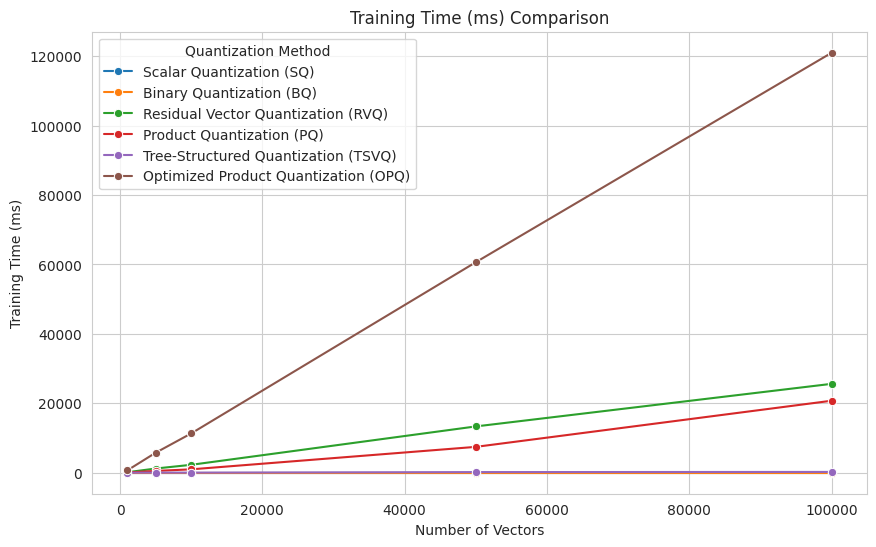

In [3]:
# Plot training time
plot_metric("training_time_ms", "Training Time (ms)", "o")

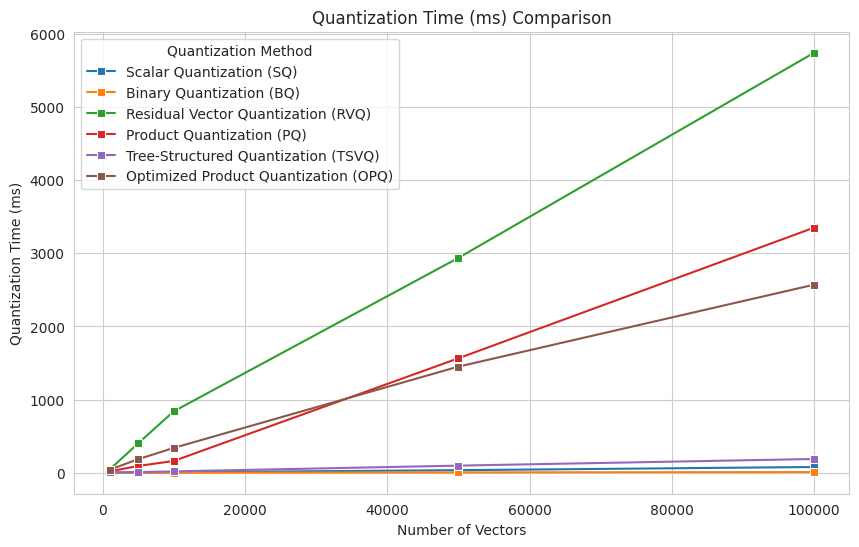

In [4]:
# Plot quantization time
plot_metric("quantization_time_ms", "Quantization Time (ms)", "s")

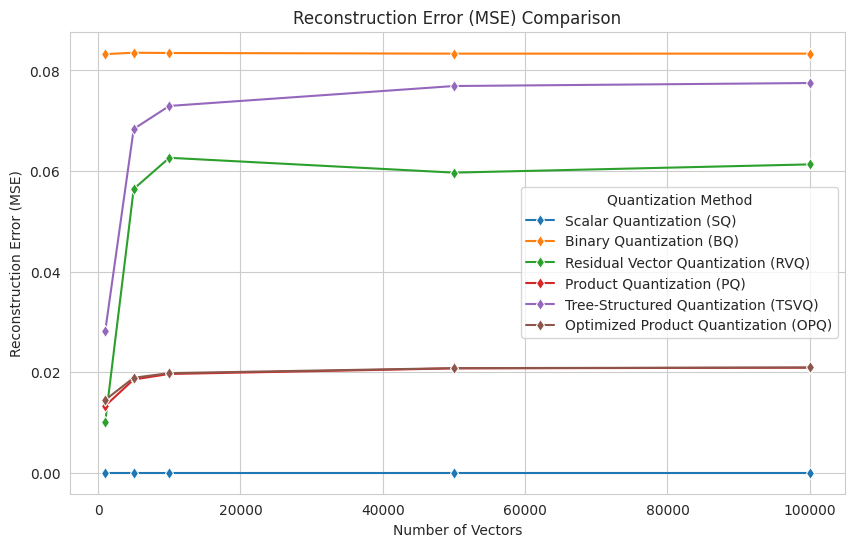

In [5]:
# Plot reconstruction_error
plot_metric("reconstruction_error", "Reconstruction Error (MSE)", "d")

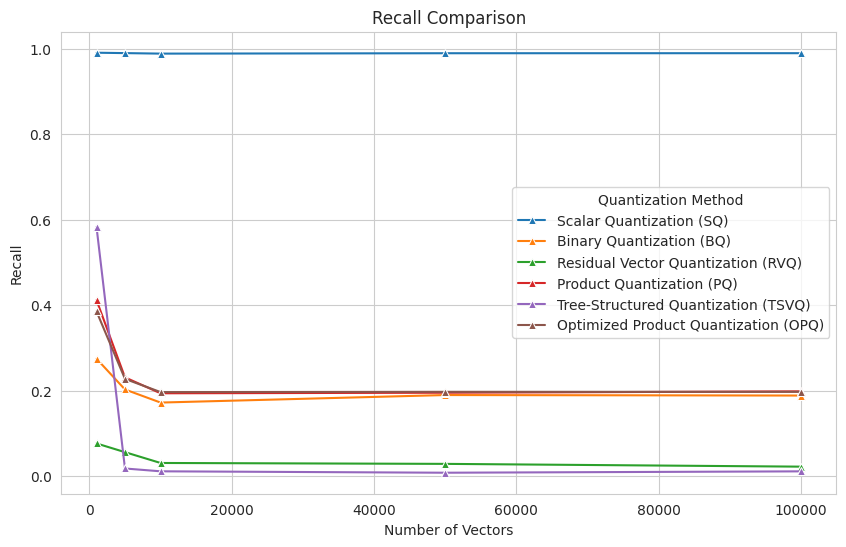

In [6]:
# Print recall_error
plot_metric("recall", "Recall", "^")